# Parsing BV files from QPU

In [1]:
# enable importing from parent directory:
import sys
sys.path.insert(0, '..\\')

import numpy as np
from numpy import array
import sys
import matplotlib.pyplot as plt
from utils2 import *

In [2]:
qvm_time_c = []
qvm_time_s = []
qvm_accuracy_c = []
qvm_accuracy_s = []
qvm_loss_c = []
qvm_loss_s = []

qpu_time_c = []
qpu_time_s = []
qpu_accuracy_c = []
qpu_accuracy_s = []
qpu_loss_c = []
qpu_loss_s = []

In [3]:
# reset values before next analysis
def clear_vars():
    global all_results; all_results = None
    global results_raws; results_raws = []
    global results; results = None
    global times; times = []
    global acc_; acc_ = None
    global time_; time_ = None
    global expected; expected = None
    
# print accuracies:
def print_accuracy(results, should_be=None):
    correct = 0
    if should_be is not None:
        for i in results:
            if np.all(i == should_be):
                correct += 1
    accuracy = correct/len(results) * 100
    print('Accuracy: {}/{} = {}%'.format(correct, len(results), accuracy))
    
    # determine most 'prominent' answer:
    unq_rows, count = np.unique(results, axis=0, return_counts=1)
    print('Most prominent: {}'.format(unq_rows[np.argmax(count)]))
    
    # calculate loss
    differences = 0
    for row in results:
        # print('{} - {} = {}'.format(row, should_be, np.abs(row - should_be)))
        differences = differences + np.sum(np.abs(row - should_be))
    loss = differences / (len(results) * len(results[0])) * 100
    return accuracy, loss

## n = 1

In [4]:
n = 1

### QVM Results

##### Complex

In [5]:
clear_vars()

In [6]:
results_raws = [
    {0: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 1: array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1]), 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 6: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [0.09954871199443005]

expected = [1 for i in range(n)]

In [7]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [8]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 10/10 = 100.0%
Most prominent: [1]


In [9]:
time_ = np.average(np.array(times))

In [10]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_c.append(acc_)
qvm_time_c.append(time_)
qvm_loss_c.append(loss_)

Accuracy: 100.0%, Time: 0.09954871199443005


##### Simple

In [11]:
clear_vars()

In [12]:
results_raws = [
    {0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 1: array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0]), 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 6: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [0.07288926100591198]

expected = [0 for i in range(n)]

In [13]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [14]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 10/10 = 100.0%
Most prominent: [0]


In [15]:
time_ = np.average(np.array(times))

In [16]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_s.append(acc_)
qvm_time_s.append(time_)
qvm_loss_s.append(loss_)

Accuracy: 100.0%, Time: 0.07288926100591198


### QPU Results

##### Complex

In [17]:
clear_vars()

In [18]:
results_raws = [
    {0: array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0]), 1: array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1]), 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 6: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 7: array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])},
    {0: array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1]), 1: array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0]), 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 6: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0]), 11: array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 15: array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])}
]

times = [0.16620689298724756, 0.16111959103727713]

expected = [1 for i in range(n)]

In [19]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [20]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 31/35 = 88.57142857142857%
Most prominent: [1]


In [21]:
time_ = np.average(np.array(times))

In [22]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_c.append(acc_)
qpu_time_c.append(time_)
qpu_loss_c.append(loss_)

Accuracy: 88.57142857142857%, Time: 0.16366324201226234


##### Simple

In [23]:
clear_vars()

In [24]:
results_raws = [
    {0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 1: array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1]), 2: array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]), 6: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]), 13: array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])},
    {0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 1: array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1]), 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0]), 6: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])}
]

times = [0.14073822600767016, 0.14530392602318898]

expected = [0 for i in range(n)]

In [25]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [26]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 35/35 = 100.0%
Most prominent: [0]


In [27]:
time_ = np.average(np.array(times))

In [28]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_s.append(acc_)
qpu_time_s.append(time_)
qpu_loss_s.append(loss_)

Accuracy: 100.0%, Time: 0.14302107601542957


## n = 2

In [29]:
n = 2

### QVM Results

##### Complex

In [30]:
clear_vars()

In [31]:
results_raws = [
    {0: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 1: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 2: array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0]), 6: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [0.15979365198290907]

expected = [1 for i in range(n)]

In [32]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


In [33]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 10/10 = 100.0%
Most prominent: [1 1]


In [34]:
time_ = np.average(np.array(times))

In [35]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_c.append(acc_)
qvm_time_c.append(time_)
qvm_loss_c.append(loss_)

Accuracy: 100.0%, Time: 0.15979365198290907


##### Simple

In [36]:
clear_vars()

In [37]:
results_raws = [
    {0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 2: array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0]), 6: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [0.039485197979956865]

expected = [0 for i in range(n)]

In [38]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [39]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 10/10 = 100.0%
Most prominent: [0 0]


In [40]:
time_ = np.average(np.array(times))

In [41]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_s.append(acc_)
qvm_time_s.append(time_)
qvm_loss_s.append(loss_)

Accuracy: 100.0%, Time: 0.039485197979956865


### QPU Results

##### Complex

In [42]:
clear_vars()

In [43]:
results_raws = [
    {0: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 1: array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1]), 2: array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1]), 6: array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 7: array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 10: array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]), 14: array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]), 16: array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])},
    {0: array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1]), 1: array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1]), 2: array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0]), 6: array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 10: array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0]), 13: array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 14: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])}
]

times = [0.21219642501091585, 0.21701541799120605]

expected = [1 for i in range(n)]

In [44]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


In [45]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 28/35 = 80.0%
Most prominent: [1 1]


In [46]:
time_ = np.average(np.array(times))

In [47]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_c.append(acc_)
qpu_time_c.append(time_)
qpu_loss_c.append(loss_)

Accuracy: 80.0%, Time: 0.21460592150106095


##### Simple

In [48]:
clear_vars()

In [49]:
results_raws = [
    {0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 2: array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0]), 6: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 10: array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])},
    {0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 2: array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0]), 6: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0]), 10: array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 14: array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])}
]

times = [0.14588459499645978, 0.14732030499726534]

expected = [0 for i in range(n)]

In [50]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [51]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 33/35 = 94.28571428571428%
Most prominent: [0 0]


In [52]:
time_ = np.average(np.array(times))

In [53]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_s.append(acc_)
qpu_time_s.append(time_)
qpu_loss_s.append(loss_)

Accuracy: 94.28571428571428%, Time: 0.14660244999686256


## n = 3

In [54]:
n = 3

### QVM Results

##### Complex

In [55]:
clear_vars()

In [56]:
results_raws = [
    {0: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 1: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 2: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 6: array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [0.2980260080075823]

expected = [1 for i in range(n)]

In [57]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]


In [58]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 10/10 = 100.0%
Most prominent: [1 1 1]


In [59]:
time_ = np.average(np.array(times))

In [60]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_c.append(acc_)
qvm_time_c.append(time_)
qvm_loss_c.append(loss_)

Accuracy: 100.0%, Time: 0.2980260080075823


##### Simple

In [61]:
clear_vars()

In [62]:
results_raws = [
    {0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 6: array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [0.0419161030149553]

expected = [0 for i in range(n)]

In [63]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


In [64]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 10/10 = 100.0%
Most prominent: [0 0 0]


In [65]:
time_ = np.average(np.array(times))

In [66]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_s.append(acc_)
qvm_time_s.append(time_)
qvm_loss_s.append(loss_)

Accuracy: 100.0%, Time: 0.0419161030149553


### QPU Results

##### Complex

In [67]:
clear_vars()

In [68]:
results_raws = [
    {0: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 1: array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1]), 2: array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1]), 6: array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0]), 7: array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1]), 10: array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1]), 17: array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1])}
]

times = [0.33941804099595174]

expected = [1 for i in range(n)]

In [69]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 1 1]
 [1 0 1]
 [1 1 1]
 [1 1 1]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]]


In [70]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 7/10 = 70.0%
Most prominent: [1 1 1]


In [71]:
time_ = np.average(np.array(times))

In [72]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_c.append(acc_)
qpu_time_c.append(time_)
qpu_loss_c.append(loss_)

Accuracy: 70.0%, Time: 0.33941804099595174


##### Simple

In [73]:
clear_vars()

In [74]:
results_raws = [
    {0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 6: array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])},
    {0: array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 6: array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0]), 10: array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 15: array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1]), 17: array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])}
]

times = [0.14838233002228662, 0.1471106539829634]

expected = [0 for i in range(n)]

In [75]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


In [76]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 34/35 = 97.14285714285714%
Most prominent: [0 0 0]


In [77]:
time_ = np.average(np.array(times))

In [78]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_s.append(acc_)
qpu_time_s.append(time_)
qpu_loss_s.append(loss_)

Accuracy: 97.14285714285714%, Time: 0.14774649200262502


## n = 4

In [79]:
n = 4

### QVM Results

##### Complex

In [80]:
clear_vars()

In [81]:
results_raws = [
    {0: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 1: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 2: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 6: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 7: array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [0.42321133098448627]

expected = [1 for i in range(n)]

In [82]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


In [83]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 10/10 = 100.0%
Most prominent: [1 1 1 1]


In [84]:
time_ = np.average(np.array(times))

In [85]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_c.append(acc_)
qvm_time_c.append(time_)
qvm_loss_c.append(loss_)

Accuracy: 100.0%, Time: 0.42321133098448627


##### Simple

In [86]:
clear_vars()

In [87]:
results_raws = [
    {0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 6: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 7: array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [0.04252150299726054]

expected = [0 for i in range(n)]

In [88]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [89]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 10/10 = 100.0%
Most prominent: [0 0 0 0]


In [90]:
time_ = np.average(np.array(times))

In [91]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_s.append(acc_)
qvm_time_s.append(time_)
qvm_loss_s.append(loss_)

Accuracy: 100.0%, Time: 0.04252150299726054


### QPU Results

##### Complex

In [92]:
clear_vars()

In [93]:
results_raws = [
    {0: array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0]), 1: array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0]), 2: array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0]), 6: array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1]), 7: array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1]), 10: array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1]), 15: array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])},
    {0: array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1]), 1: array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1]), 2: array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1]), 6: array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0]), 7: array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1]), 10: array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 14: array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 17: array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1])}
]

times = [0.4614478680305183, 0.43692429800285026]

expected = [1 for i in range(n)]

In [94]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 1 1 1]
 [0 1 0 0]
 [1 0 0 0]
 [1 1 1 0]
 [1 1 0 0]
 [1 1 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 1]
 [0 0 0 1]
 [0 1 1 0]
 [1 1 1 0]
 [1 0 1 0]
 [1 1 1 0]
 [0 0 1 0]
 [1 1 1 1]
 [1 1 0 0]
 [0 1 1 0]
 [1 0 1 0]
 [1 1 1 0]
 [1 1 1 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 1 0]
 [0 1 0 0]
 [1 0 0 1]
 [1 1 1 1]
 [1 0 1 0]
 [1 1 1 0]
 [1 1 0 1]
 [1 1 1 0]
 [1 1 1 0]
 [1 1 1 0]]


In [95]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 3/35 = 8.571428571428571%
Most prominent: [1 1 1 0]


In [96]:
time_ = np.average(np.array(times))

In [97]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_c.append(acc_)
qpu_time_c.append(time_)
qpu_loss_c.append(loss_)

Accuracy: 8.571428571428571%, Time: 0.4491860830166843


##### Simple

In [98]:
clear_vars()

In [99]:
results_raws = [
    {0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 6: array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1]), 7: array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])},
    {0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 6: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0]), 7: array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 15: array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])}
]

times = [0.1471431669779122, 0.14865662902593613]

expected = [0 for i in range(n)]

In [100]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[0 0 0 0]
 [0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [101]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 31/35 = 88.57142857142857%
Most prominent: [0 0 0 0]


In [102]:
time_ = np.average(np.array(times))

In [103]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_s.append(acc_)
qpu_time_s.append(time_)
qpu_loss_s.append(loss_)

Accuracy: 88.57142857142857%, Time: 0.14789989800192416


## n = 5

In [104]:
n = 5

### QVM Results

##### Complex

In [105]:
clear_vars()

In [106]:
results_raws = [
    {0: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 1: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 2: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 6: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 7: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 10: array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [0.66202878500917]

expected = [1 for i in range(n)]

In [107]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [108]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 10/10 = 100.0%
Most prominent: [1 1 1 1 1]


In [109]:
time_ = np.average(np.array(times))

In [110]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_c.append(acc_)
qvm_time_c.append(time_)
qvm_loss_c.append(loss_)

Accuracy: 100.0%, Time: 0.66202878500917


##### Simple

In [111]:
clear_vars()

In [112]:
results_raws = [
    {0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 6: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 10: array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [0.04273138800635934]

expected = [0 for i in range(n)]

In [113]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [114]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 10/10 = 100.0%
Most prominent: [0 0 0 0 0]


In [115]:
time_ = np.average(np.array(times))

In [116]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_s.append(acc_)
qvm_time_s.append(time_)
qvm_loss_s.append(loss_)

Accuracy: 100.0%, Time: 0.04273138800635934


### QPU Results

##### Complex

In [117]:
clear_vars()

In [118]:
results_raws = [
    {0: array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0]), 1: array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1]), 2: array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0]), 6: array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0]), 7: array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1]), 10: array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]), 14: array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1])},
    {0: array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1]), 1: array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1]), 2: array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 6: array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1]), 7: array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1]), 10: array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 14: array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 16: array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 17: array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0])}
]

times = [0.5729608100373298, 0.6189632980385795]

expected = [1 for i in range(n)]

In [119]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[0 1 1 1 1]
 [1 1 0 0 1]
 [1 1 0 0 0]
 [1 1 1 1 0]
 [1 0 1 0 1]
 [1 0 1 0 0]
 [0 1 1 0 1]
 [1 1 1 0 0]
 [1 1 1 0 1]
 [0 1 0 0 1]
 [1 1 1 0 1]
 [1 1 0 1 0]
 [1 1 0 0 1]
 [0 1 1 1 1]
 [0 1 1 0 0]
 [0 1 1 1 0]
 [1 0 1 1 0]
 [0 1 0 0 0]
 [0 1 1 1 1]
 [0 1 1 1 1]
 [1 0 1 1 0]
 [1 1 1 1 1]
 [1 0 0 1 0]
 [1 0 1 0 1]
 [1 1 0 1 1]
 [1 1 1 1 1]
 [0 1 0 0 0]
 [0 1 0 1 0]
 [1 1 0 1 0]
 [1 1 0 1 0]
 [1 1 0 1 1]
 [0 0 0 1 1]
 [1 1 0 1 1]
 [1 1 0 0 1]
 [1 1 0 1 1]]


In [120]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 2/35 = 5.714285714285714%
Most prominent: [0 1 1 1 1]


In [121]:
time_ = np.average(np.array(times))

In [122]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_c.append(acc_)
qpu_time_c.append(time_)
qpu_loss_c.append(loss_)

Accuracy: 5.714285714285714%, Time: 0.5959620540379547


##### Simple

In [123]:
clear_vars()

In [124]:
results_raws = [
    {0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 2: array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0]), 6: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 10: array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]), 15: array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])},
    {0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 1: array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0]), 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 6: array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 10: array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 13: array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0])}
]

times = [0.14507235499331728, 0.1500157139962539]

expected = [0 for i in range(n)]

In [125]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [126]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 28/35 = 80.0%
Most prominent: [0 0 0 0 0]


In [127]:
time_ = np.average(np.array(times))

In [128]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_s.append(acc_)
qpu_time_s.append(time_)
qpu_loss_s.append(loss_)

Accuracy: 80.0%, Time: 0.1475440344947856


## n = 6

In [129]:
n = 6

### QVM Results

##### Complex

In [130]:
clear_vars()

In [131]:
results_raws = [
    {0: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 1: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 2: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 6: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 7: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 10: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 11: array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [0.8367948089726269]

expected = [1 for i in range(n)]

In [132]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]


In [133]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 10/10 = 100.0%
Most prominent: [1 1 1 1 1 1]


In [134]:
time_ = np.average(np.array(times))

In [135]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_c.append(acc_)
qvm_time_c.append(time_)
qvm_loss_c.append(loss_)

Accuracy: 100.0%, Time: 0.8367948089726269


##### Simple

In [136]:
clear_vars()

In [137]:
results_raws = [
    {0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 6: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [0.051723058975767344]

expected = [0 for i in range(n)]

In [138]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [139]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 10/10 = 100.0%
Most prominent: [0 0 0 0 0 0]


In [140]:
time_ = np.average(np.array(times))

In [141]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_s.append(acc_)
qvm_time_s.append(time_)
qvm_loss_s.append(loss_)

Accuracy: 100.0%, Time: 0.051723058975767344


### QPU Results

##### Complex

In [142]:
clear_vars()

In [143]:
results_raws = [
    {0: array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0]), 1: array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1]), 2: array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0]), 6: array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1]), 7: array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1]), 10: array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0]), 11: array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1]), 15: array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0]), 16: array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])},
    {0: array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1]), 1: array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0]), 2: array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0]), 6: array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1]), 7: array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0]), 10: array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0]), 11: array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 14: array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0]), 15: array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 16: array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])}
]

times = [0.7832255800021812, 0.8264491579611786]

expected = [1 for i in range(n)]

In [144]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 1 0 1 1 1]
 [0 0 1 0 1 0]
 [1 0 1 0 0 0]
 [1 1 1 0 0 1]
 [1 0 1 1 1 1]
 [1 0 0 0 1 0]
 [0 0 0 1 0 1]
 [0 1 1 0 0 0]
 [1 0 1 1 1 0]
 [0 1 0 1 1 0]
 [0 0 1 0 1 1]
 [1 1 0 1 1 1]
 [1 0 1 0 1 1]
 [1 0 1 1 1 0]
 [0 1 1 0 1 1]
 [1 0 0 0 0 0]
 [1 0 1 0 0 1]
 [1 0 0 1 0 0]
 [1 0 0 0 0 1]
 [0 0 1 0 0 1]
 [1 1 0 1 1 1]
 [0 0 1 0 0 0]
 [1 0 0 1 1 1]
 [0 0 1 0 0 1]
 [1 0 0 0 0 1]
 [0 0 1 1 0 1]
 [1 0 1 0 0 1]
 [0 0 1 1 1 0]
 [0 0 1 1 0 0]
 [0 0 1 1 0 0]
 [0 1 1 0 1 0]
 [0 1 0 1 0 0]
 [0 1 1 1 1 1]
 [0 1 1 0 0 1]
 [1 0 0 1 0 0]]


In [145]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 0/35 = 0.0%
Most prominent: [1 1 0 1 1 1]


In [146]:
time_ = np.average(np.array(times))

In [147]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_c.append(acc_)
qpu_time_c.append(time_)
qpu_loss_c.append(loss_)

Accuracy: 0.0%, Time: 0.8048373689816799


##### Simple

In [148]:
clear_vars()

In [149]:
results_raws = [
    {0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 6: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 11: array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])},
    {0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 1: array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 6: array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0]), 11: array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0]), 15: array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0])}
]

times = [0.14753933297470212, 0.15844892500899732]

expected = [0 for i in range(n)]

In [150]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]]


In [151]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 29/35 = 82.85714285714286%
Most prominent: [0 0 0 0 0 0]


In [152]:
time_ = np.average(np.array(times))

In [153]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_s.append(acc_)
qpu_time_s.append(time_)
qpu_loss_s.append(loss_)

Accuracy: 82.85714285714286%, Time: 0.15299412899184972


## Plot the times and accuracies

### Times

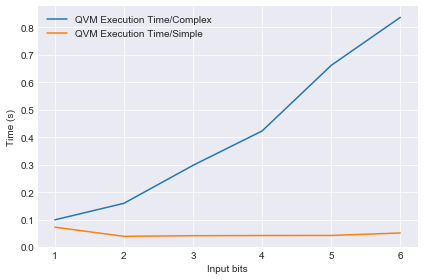

In [154]:
x = list(range(1, 7))

plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(x, qvm_time_c, label='QVM Execution Time/Complex')
plt.plot(x, qvm_time_s, label='QVM Execution Time/Simple')
plt.legend()
plt.xticks(x)
plt.xlabel('Input bits')
plt.ylabel('Time (s)')
plt.tight_layout()
plt.savefig('bv_qvm_exec_time')
plt.show()

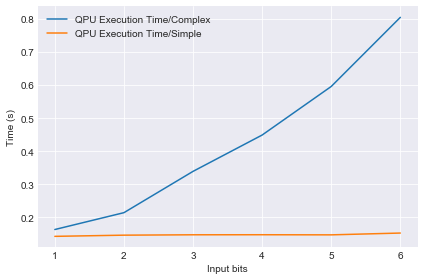

In [155]:
x = list(range(1, 7))

plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(x, qpu_time_c, label='QPU Execution Time/Complex')
plt.plot(x, qpu_time_s, label='QPU Execution Time/Simple')
plt.legend()
plt.xticks(x)
plt.xlabel('Input bits')
plt.ylabel('Time (s)')
plt.tight_layout()
plt.savefig('bv_qpu_exec_time')
plt.show()

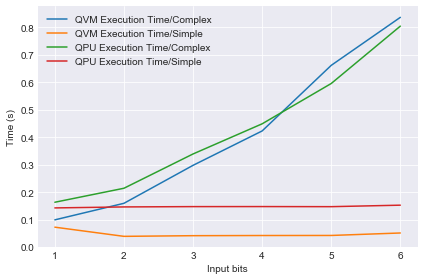

In [156]:
x = list(range(1, 7))

plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(x, qvm_time_c, label='QVM Execution Time/Complex')
plt.plot(x, qvm_time_s, label='QVM Execution Time/Simple')
plt.plot(x, qpu_time_c, label='QPU Execution Time/Complex')
plt.plot(x, qpu_time_s, label='QPU Execution Time/Simple')
plt.legend()
plt.xticks(x)
plt.xlabel('Input bits')
plt.ylabel('Time (s)')
plt.tight_layout()
plt.savefig('bv_both_exec_time')
plt.show()

### Accuracies

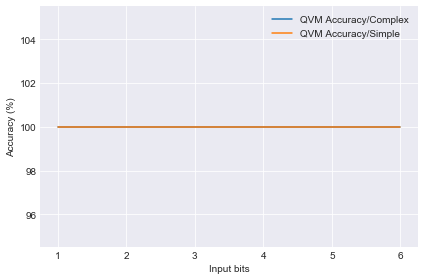

In [157]:
x = list(range(1, 7))

plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(x, qvm_accuracy_c, label='QVM Accuracy/Complex')
plt.plot(x, qvm_accuracy_s, label='QVM Accuracy/Simple')
plt.legend()
plt.xticks(x)
plt.xlabel('Input bits')
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.savefig('bv_qvm_acc')
plt.show()

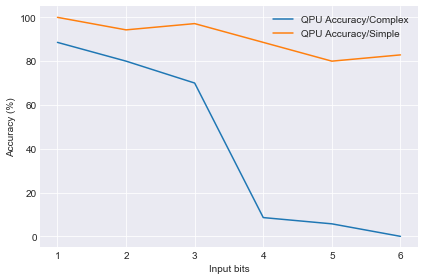

In [158]:
x = list(range(1, 7))

plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(x, qpu_accuracy_c, label='QPU Accuracy/Complex')
plt.plot(x, qpu_accuracy_s, label='QPU Accuracy/Simple')
plt.legend()
plt.xticks(x)
plt.xlabel('Input bits')
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.savefig('bv_qpu_acc')
plt.show()

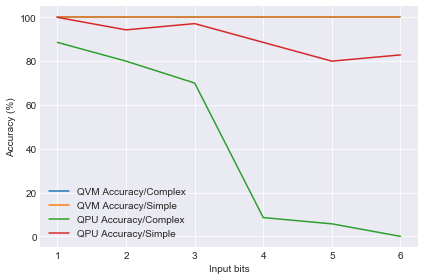

In [159]:
x = list(range(1, 7))

plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(x, qvm_accuracy_c, label='QVM Accuracy/Complex')
plt.plot(x, qvm_accuracy_s, label='QVM Accuracy/Simple')
plt.plot(x, qpu_accuracy_c, label='QPU Accuracy/Complex')
plt.plot(x, qpu_accuracy_s, label='QPU Accuracy/Simple')
plt.legend()
plt.xticks(x)
plt.xlabel('Input bits')
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.savefig('bv_both_acc')
plt.show()

### Accuracies

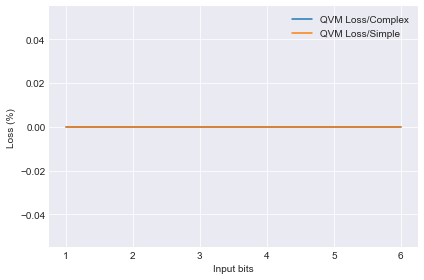

In [160]:
x = list(range(1, 7))

plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(x, qvm_loss_c, label='QVM Loss/Complex')
plt.plot(x, qvm_loss_s, label='QVM Loss/Simple')
plt.legend()
plt.xticks(x)
plt.xlabel('Input bits')
plt.ylabel('Loss (%)')
plt.tight_layout()
plt.savefig('bv_qvm_loss')
plt.show()

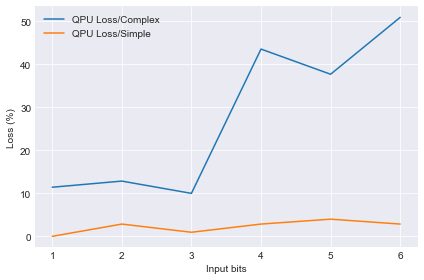

In [161]:
x = list(range(1, 7))

plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(x, qpu_loss_c, label='QPU Loss/Complex')
plt.plot(x, qpu_loss_s, label='QPU Loss/Simple')
plt.legend()
plt.xticks(x)
plt.xlabel('Input bits')
plt.ylabel('Loss (%)')
plt.tight_layout()
plt.savefig('bv_qpu_loss')
plt.show()

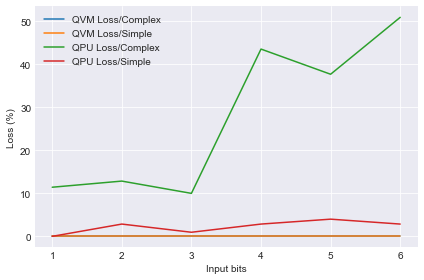

In [162]:
x = list(range(1, 7))

plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(x, qvm_loss_c, label='QVM Loss/Complex')
plt.plot(x, qvm_loss_s, label='QVM Loss/Simple')
plt.plot(x, qpu_loss_c, label='QPU Loss/Complex')
plt.plot(x, qpu_loss_s, label='QPU Loss/Simple')
plt.legend()
plt.xticks(x)
plt.xlabel('Input bits')
plt.ylabel('Loss (%)')
plt.tight_layout()
plt.savefig('bv_both_loss')
plt.show()